MidTerm Assignment - Thiery Suhner

1 - (a) and (b)

In [61]:
import time

# Initialize lists to store the matrices
list_A = []
list_B = []
list_result = []

# Loop through values of n from 1 to 1002 with each increment being 50
for n in range(1, 1002, 50):
    # Create an n x n matrix filled with ones / zeros (in result matrix) for each list
    A = [[1] * n for _ in range(n)]
    B = [[1] * n for _ in range(n)]
    result = [[0] * n for _ in range(n)]
    
    # Append each matrix to its respective list
    list_A.append(A)
    list_B.append(B)
    list_result.append(result)

file = open('times.txt','w') # Create / open file to write times into it in order to use them in 1(c) without calculating them again
print("Computation time (in seconds) for respective matrix dimension:") # Print the title of code output
for i in range(0,21): # Loop through all 21 matrices created above
    start_time = time.time() # Save the time computation starts

    # Get the matrix at the index of the current iteration out of the list of matrices
    A = list_A[i]
    B = list_B[i]
    result = list_result[i] 

    # Standard matrix mulitplication algorithm with 3 for loops
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    end_time = time.time() # Save the time computation is finished
    iteration_time = end_time - start_time # Calculate the time this iteration took to compute
    matrix_size = len(A) # Get matrix dimension to print it out afterwards
    
    # Write the time this iteration took to compute (as a string) and a newline character into the file
    file.write(str(iteration_time)) 
    file.write('\n')

    # Print out the matrix dimension and the time, idented according to length of matrix dimension legend
    if matrix_size < 100:
        print(f"{matrix_size}x{matrix_size}:\t\t{iteration_time}")
    else:
        print(f"{matrix_size}x{matrix_size}:\t{iteration_time}")

file.close() # Close file after writing in all the computation times

Computation time (in seconds) for respective matrix dimension:
1x1:		2.3603439331054688e-05
51x51:		0.03853487968444824
101x101:	0.2689833641052246
151x151:	0.8929049968719482
201x201:	2.0534474849700928
251x251:	4.769099712371826
301x301:	8.924782514572144
351x351:	13.125149488449097
401x401:	19.62980580329895
451x451:	29.430340051651
501x501:	40.18398880958557
551x551:	51.46887493133545
601x601:	71.08269667625427
651x651:	96.86361312866211
701x701:	102.39215040206909
751x751:	155.07809734344482
801x801:	171.17143440246582
851x851:	175.15890645980835
901x901:	226.52056121826172
951x951:	271.84794640541077
1001x1001:	339.49223279953003


1 - (c)

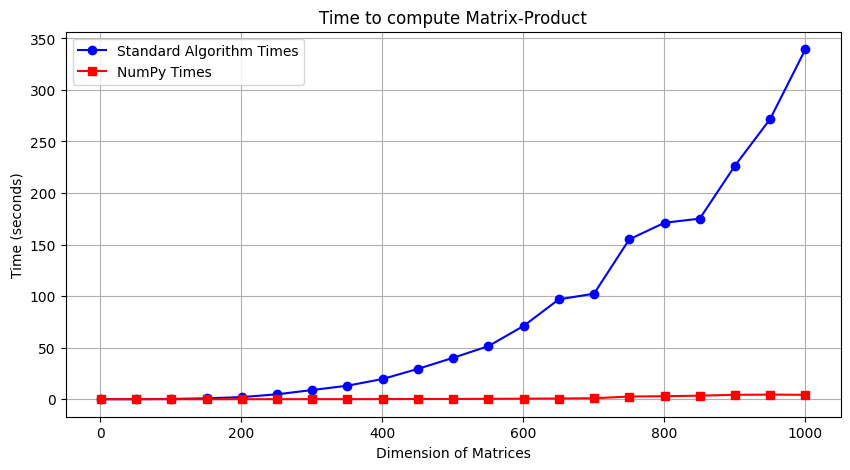

In [65]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the matrices
list_A = []
list_B = []
list_result = []

# Loop through values of n from 1 to 1002 with each increment being 50
for n in range(1, 1002, 50):
    # Create an n x n matrix filled with ones / zeros (in result matrix) for each list
    A = [[1] * n for _ in range(n)]
    B = [[1] * n for _ in range(n)]
    result = [[0] * n for _ in range(n)]
    
    # Append each matrix to its respective list
    list_A.append(A)
    list_B.append(B)
    list_result.append(result)

# Create lists to store computation times that my naive "manual" approach takes and 
# read them from the file created in the code snippet above to save double the computation time
times_man = []  
times_man_float = []
with open('times.txt','r') as file:
    times_man = file.read().split("\n") # Reads times line by line and saves them as a string
    times_man_float = [float(t) for t in times_man[:-1]] # Times are converted to float data type for plotting, last element excluded as it's only a newline character

# ----- NUMPY -----
times_np = [] # Initialzie empty list to store computation times NumPy takes
for i in range(0,21): # Loop through all 21 matrices created above
    start_time = time.time() # Save the time computation starts

    # Get the matrix at the index of the current iteration out of the list of matrices
    # and store it as a NumPy-Array for computation later
    A = np.array(list_A[i]) 
    B = np.array(list_B[i])
    
    result = np.linalg.matmul(A,B) # Compute the product of multiplying matrix A and B
        
    end_time = time.time() # Save the time computation is finished
    iteration_time = end_time - start_time # Calculate the time this iteration took to compute
    times_np.append(iteration_time) # Push the newly calculated time into the list of NumPy computation times

# ----- Plotting the graph -----
iterations = [n for n in range(1, 1002, 50)] # Create list with matrix dimensions for label on x-axis 
plt.figure(figsize=(10, 5)) # Define size of the plot

# Plot the lines for standard algorithm / NumPy times according to times stored in respective lists before
plt.plot(iterations, times_man_float, marker='o', linestyle='-', color='b', label='Standard Algorithm Times')
plt.plot(iterations, times_np, marker='s', linestyle='-', color='r', label='NumPy Times')

# Define title of graph and labes for both axises
plt.xlabel('Dimension of Matrices')
plt.ylabel('Time (seconds)')
plt.title('Time to compute Matrix-Product')

# Make the legend and grid visible and output/display the graph created
plt.legend()
plt.grid(True)
plt.show()

1 - (d)

The time complexity of my implementation is O(n^3), as we have 3 nested for loops of n. The time complexity of the NumPy implementation appears to have a significiantly lower time complexity, likely leveraging alogrithms or optimizations to achieve better perfomance. My guess would be around 0(n^2.3).

1 - (e)

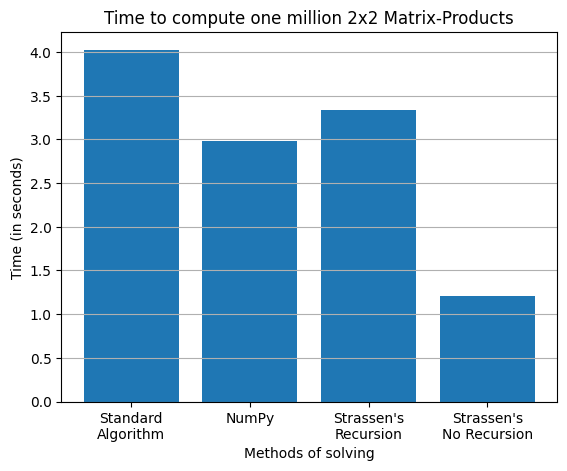

In [70]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store times
times = []

# Create a 2x2 matrix filled with ones / zeros (in result matrix)
A = [[1] * 2 for _ in range(2)]
B = [[1] * 2 for _ in range(2)]
result = [[0] * 2 for _ in range(2)]

# ----- Standard Algorithm -----
start_time = time.time() # Save computation start time

for h in range(1000000): # Let calculations run through one million times to make time differences clearer
    # Standard matrix mulitplication algorithm with 3 for loops
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

end_time = time.time() # Save the time computation is finished
iteration_time = end_time - start_time # Calculate the time this method took to compute one million 2x2 matrices
times.append(iteration_time) # Push time into list with times of the different methods

# ----- NUMPY -----
start_time = time.time() # Save computation start time

for h in range(1000000): # Let calculations run through one million times to make time differences clearer
    
    # Create NumPy arrays for calculations out of 2x2 matrices created earlier
    A = np.array(A)
    B = np.array(B)

    result = np.linalg.matmul(A,B) # Compute the product of multiplying matrix A and B
    
end_time = time.time() # Save the time computation is finished
iteration_time = end_time - start_time # Calculate the time this method took to compute one million 2x2 matrices
times.append(iteration_time) # Push time into list with times of the different methods


# ----- Strassen's Algorithm -----
# Define the recursive version of Strassen's Algorithm to call it later on
def strassen_recursive(A,B):
    # Base case if matrix is just 1-dimensional for recursive executions
    if len(A) == 1:
        return A[0][0] * B[0][0]

    # Case for 2 x 2 matrices
    elif len(A) == 2:
        # Extract elements from the matrices
        a11, a12, a21, a22 = A[0][0], A[0][1], A[1][0], A[1][1]
        b11, b12, b21, b22 = B[0][0], B[0][1], B[1][0], B[1][1]
        
        # Compute the 7 products using Strassen's algorithm with recursion
        p1 = strassen_recursive([[a11 + a22]], [[b11 + b22]])
        p2 = strassen_recursive([[a21 + a22]], [[b11]])
        p3 = strassen_recursive([[a11]], [[b12 - b22]])
        p4 = strassen_recursive([[a22]], [[b21 - b11]])
        p5 = strassen_recursive([[a11 + a12]], [[b22]])
        p6 = strassen_recursive([[a21 - a11]], [[b11 + b12]])
        p7 = strassen_recursive([[a12 - a22]], [[b21 + b22]])
        
        # Calculate elements of the result matrix
        c11 = p1 + p4 - p5 + p7
        c12 = p3 + p5
        c21 = p2 + p4
        c22 = p1 + p3 - p2 + p6
        
        # Return the resulting matrix
        return [[c11, c12], [c21, c22]]

# Define the non-recursive version of Strassen's Algorithm to call it later on
def strassen_not_recursive(A,B):
    # Extract elements from the matrices
    a11, a12, a21, a22 = A[0][0], A[0][1], A[1][0], A[1][1]
    b11, b12, b21, b22 = B[0][0], B[0][1], B[1][0], B[1][1]
    
    # Compute the 7 products without recursion
    p1 = (a11 + a22) * (b11 + b22)
    p2 = (a21 + a22) * b11
    p3 = a11 * (b12 - b22)
    p4 = a22 * (b21 - b11)
    p5 = (a11 + a12) * b22
    p6 = (a21 - a11) * (b11 + b12)
    p7 = (a12 - a22) * (b21 + b22)
    
    # Calculate the elements of the resulting matrix
    c11 = p1 + p4 - p5 + p7
    c12 = p3 + p5
    c21 = p2 + p4
    c22 = p1 + p3 - p2 + p6
    
    # Return the resulting matrix
    return [[c11, c12],[c21, c22]]


start_time = time.time() # Save computation start time
for h in range(1000000): strassen_recursive([[1,1],[1,1]],[[1,1],[1,1]]) # Call recursive function to compute the product and let calculations run through one million times to make time differences clearer
end_time = time.time() # Save the time computation is finished
iteration_time = end_time - start_time # Calculate the time this method took to compute one million 2x2 matrices
times.append(iteration_time) # Push time into list with times of the different methods

start_time = time.time() # Save computation start time
for h in range(1000000): strassen_not_recursive([[1,1],[1,1]],[[1,1],[1,1]]) # Call non-recursive function to compute the product and let calculations run through one million times to make time differences clearer
end_time = time.time() # Save the time computation is finished
iteration_time = end_time - start_time # Calculate the time this method took to compute one million 2x2 matrices
times.append(iteration_time) # Push time into list with times of the different methods


# ----- Plotting the graph -----
# Create labels for each bar
labels = ['Standard\nAlgorithm', 'NumPy', 'Strassen\'s\nRecursion', 'Strassen\'s\nNo Recursion']

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, times) # Use the labels created above and the complete list of times

# Add axis-labels, title and grid on y-axis
ax.set_xlabel('Methods of solving')
ax.set_ylabel('Time (in seconds)')
ax.set_title('Time to compute one million 2x2 Matrix-Products')
ax.grid(True,'major','y')

# Output/display the chart
plt.show()